In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import files
from IPython.display import Image

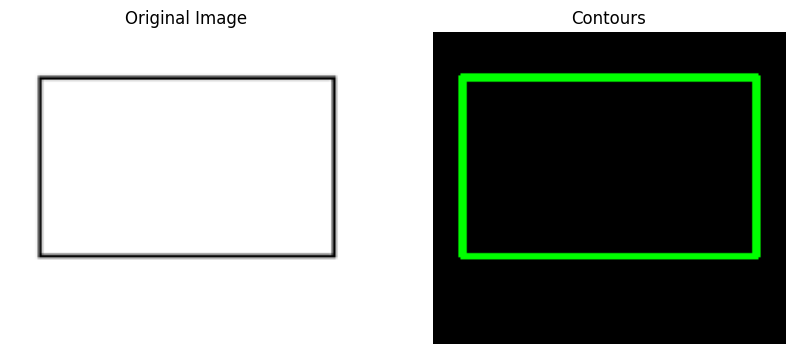

Chain Code for Contour 
 1 : [2, 2, 0, 0, 0, 0, 6, 6, 4, 4, 4, 4]
Chain Code for Contour 
 2 : [0, 0, 0, 2, 2, 2, 4, 4, 4, 4, 6, 6]


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('rect1.png')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)
# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Display the original image and contour image using pyplot
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Contour image
contour_image = np.zeros_like(image)
for contour in contours:
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.axis('off')

plt.show()

# Generate chain code for each contour
for i, contour in enumerate(contours):
    chain_code = []
    for j in range(1, len(contour)):
      if j%35==0:
        # Calculate the direction from the previous point to the current one
        dx = contour[j][0][0] - contour[j-1][0][0]
        dy = contour[j][0][1] - contour[j-1][0][1]

        # Encode the direction into a chain code
        if dx == 1 and dy == 0:
            chain_code.append(0)
        elif dx == 1 and dy == 1:
            chain_code.append(1)
        elif dx == 0 and dy == 1:
            chain_code.append(2)
        elif dx == -1 and dy == 1:
            chain_code.append(3)
        elif dx == -1 and dy == 0:
            chain_code.append(4)
        elif dx == -1 and dy == -1:
            chain_code.append(5)
        elif dx == 0 and dy == -1:
            chain_code.append(6)
        elif dx == 1 and dy == -1:
            chain_code.append(7)

    # Print the chain code for each contour
    print("Chain Code for Contour \n", i+1, ":", chain_code)


In [16]:
print(image.shape)

(148, 167, 3)


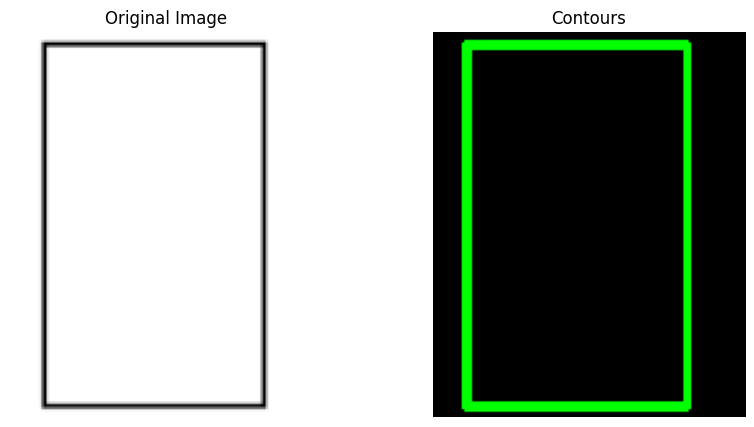

Chain Code for Contour 1 : [1, 1, 1, 0, 0, 3, 3, 3, 3, 2, 2]
Chain Code for Contour 2 : [0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3]


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('rect1.png')

# Adjust the center and size based on the new image size
center = (148 // 2, 167 // 2)
new_size = (120, 148)

# Rotation matrix
m = cv2.getRotationMatrix2D(center, 90, 1)
image1 = cv2.warpAffine(image, m, new_size)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# Threshold the image to get a binary image
_, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, _ = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Display the original image and contour image using pyplot
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Contour image
contour_image = np.zeros_like(image1)
for contour in contours:
    cv2.drawContours(contour_image, [contour], -1, (0, 255, 0), 2)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours')
plt.axis('off')

plt.show()

# Generate chain code for each contour
for i, contour in enumerate(contours):
    chain_code = []

    # Find the starting point of the contour
    start_point = min(contour[:, 0, 0])  # Minimum x-coordinate

    for j in range(1, len(contour)):
        if j % 35 == 0:
            # Calculate the direction from the previous point to the current one
            dx = contour[j][0][0] - contour[j - 1][0][0]
            dy = contour[j][0][1] - contour[j - 1][0][1]

            # Encode the direction into a chain code
            if dx == 1 and dy == 0:
                chain_code.append(0)
           # elif dx == 1 and dy == 1:
             #   chain_code.append(1)
            elif dx == 0 and dy == 1:
                chain_code.append(1)
          #  elif dx == -1 and dy == 1:
            #    chain_code.append(3)
            elif dx == -1 and dy == 0:
                chain_code.append(2)
            #elif dx == -1 and dy == -1:
              #  chain_code.append(5)
            elif dx == 0 and dy == -1:
                chain_code.append(3)
            #elif dx == 1 and dy == -1:
              #  chain_code.append(7)

    # Adjust chain code to start from the minimum x-coordinate point
    start_index = np.argmin(contour[:, 0, 0])
    chain_code = chain_code[start_index:] + chain_code[:start_index]

    # Print the chain code for each contour
    print("Chain Code for Contour", i + 1, ":", chain_code)
